In [1]:
import numpy as np 
import pandas as pd
import csv

import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# The Business Problem Exploring 

In [2]:
data = pd.read_csv("Train.csv")
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
data.shape

(8523, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
grouped_weights = data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
data['Item_Weight'] = data['Item_Weight'].fillna(grouped_weights)
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.39500,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Converting Categorical To Numerical

In [49]:
# Define columns to encode
columns_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=columns_to_encode)


In [50]:
outlet_size_mean = data.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].mean()
outlet_size_median = data.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].median()
def impute_outlet_size(row):
    if pd.isnull(row['Outlet_Size']):
        return outlet_size_median[row['Outlet_Type'], row['Outlet_Location_Type']]
    else:
        return row['Outlet_Size']
data['Outlet_Size'] = data.apply(impute_outlet_size, axis=1)


# EDA

{'Item_Weight': array([], dtype=float64), 'Item_Visibility': array([], dtype=float64), 'Item_MRP': array([], dtype=float64), 'Outlet_Establishment_Year': array([], dtype=int64), 'Outlet_Size': array([], dtype=int64), 'Outlet_Location_Type': array([], dtype=int8), 'Outlet_Type': array([2, 0, 2, ..., 2, 2, 2], dtype=int8), 'Item_Outlet_Sales': array([], dtype=float64), 'Outlet_Type_Code': array([2, 0, 2, ..., 2, 2, 2], dtype=int8), 'Outlet_Years': array([], dtype=int64)}


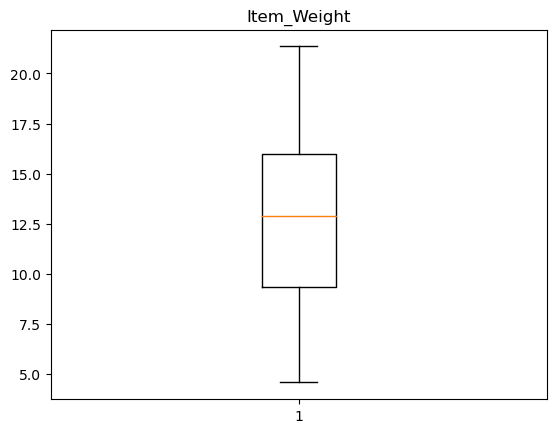

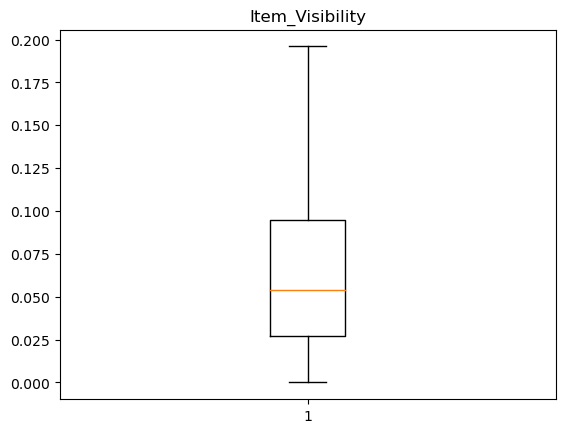

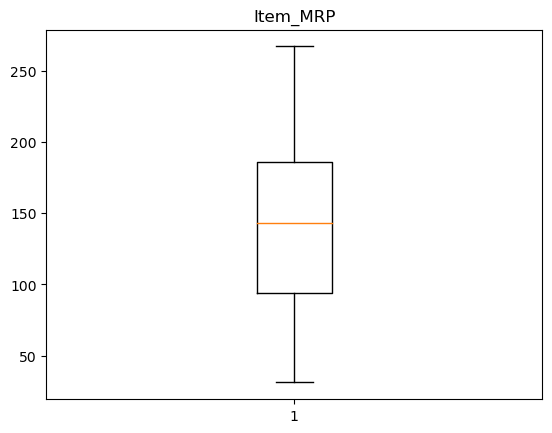

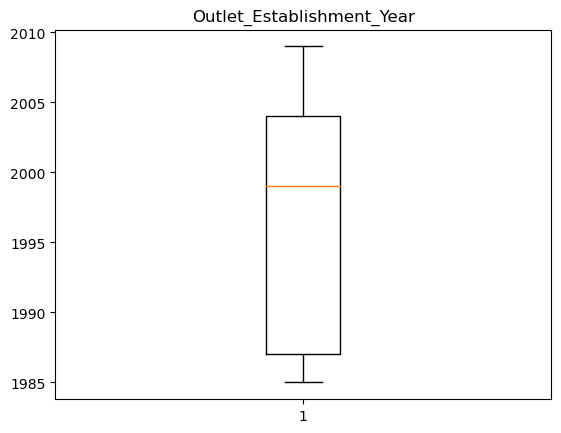

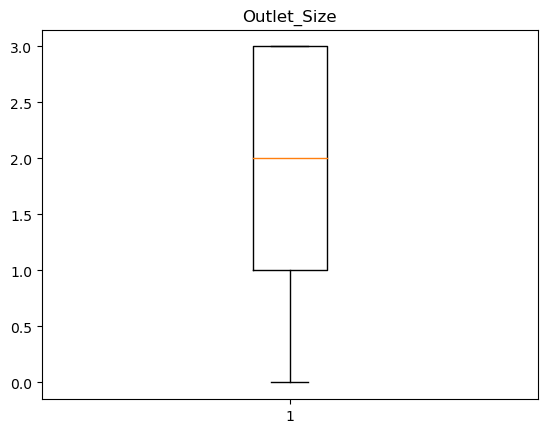

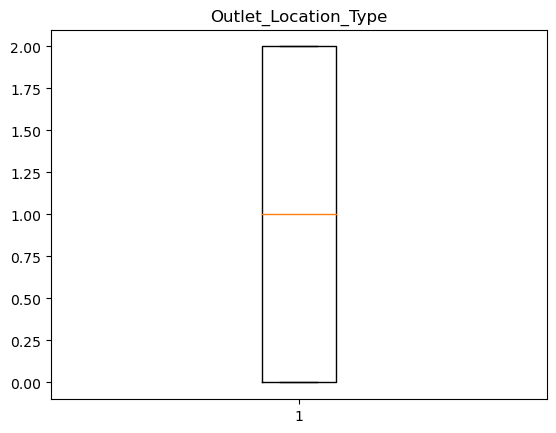

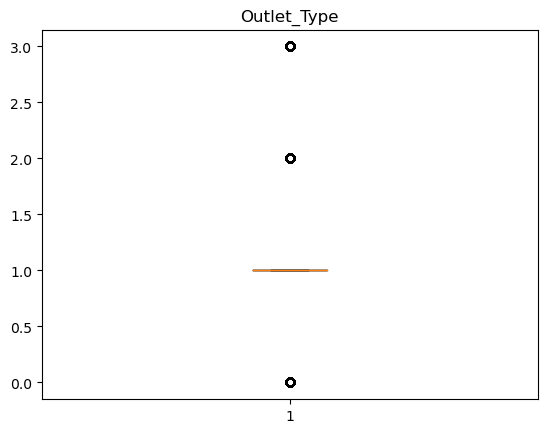

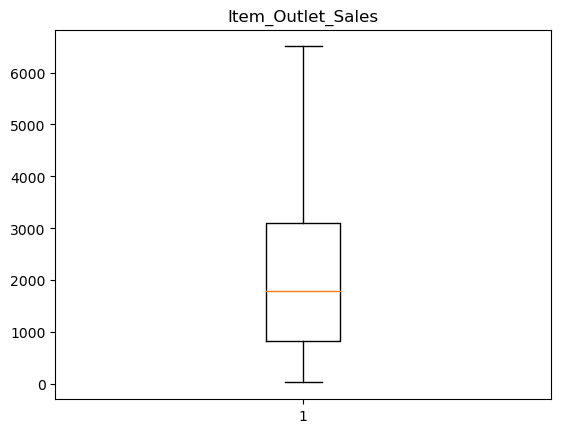

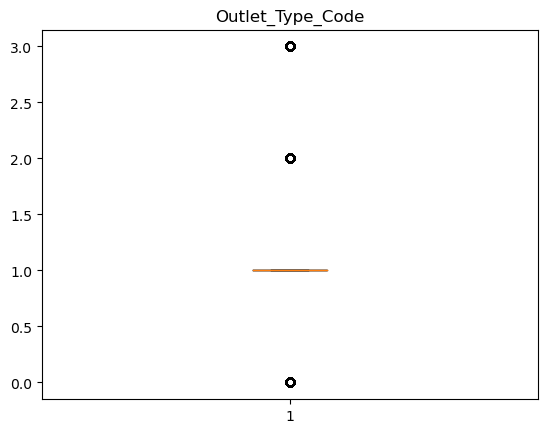

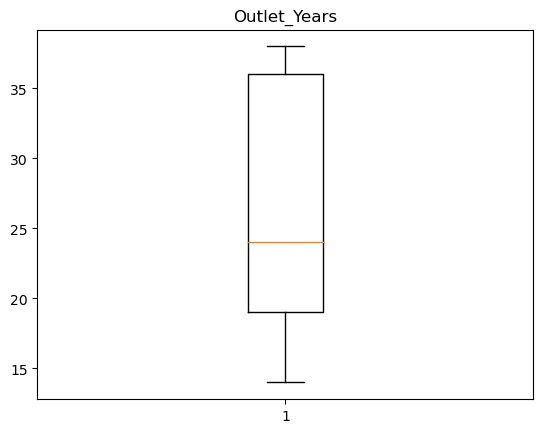

In [51]:
import matplotlib.pyplot as plt



# Plot boxplots for each column
for col in data.columns:
    if data[col].dtype != 'object':
        plt.figure()
        plt.boxplot(data[col])
        plt.title(col)

# Identify outliers
outliers = {}
for col in data.columns:
    if data[col].dtype != 'object':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].values

# Print the outliers
print(outliers)


In [52]:
numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Loop over the columns with numerical values
for col in numeric_cols:
    # Calculate IQR and the upper and lower bounds
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


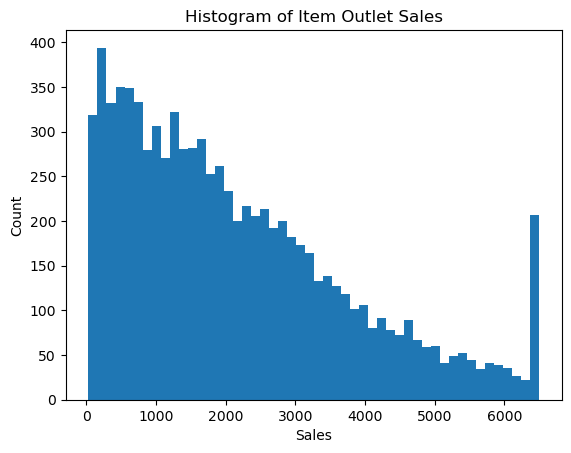

In [53]:
import matplotlib.pyplot as plt

plt.hist(data['Item_Outlet_Sales'], bins=50)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Histogram of Item Outlet Sales')
plt.show()


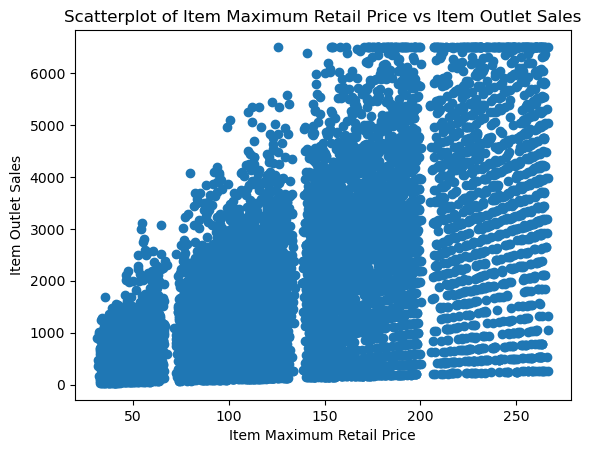

In [54]:
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.xlabel('Item Maximum Retail Price')
plt.ylabel('Item Outlet Sales')
plt.title('Scatterplot of Item Maximum Retail Price vs Item Outlet Sales')
plt.show()


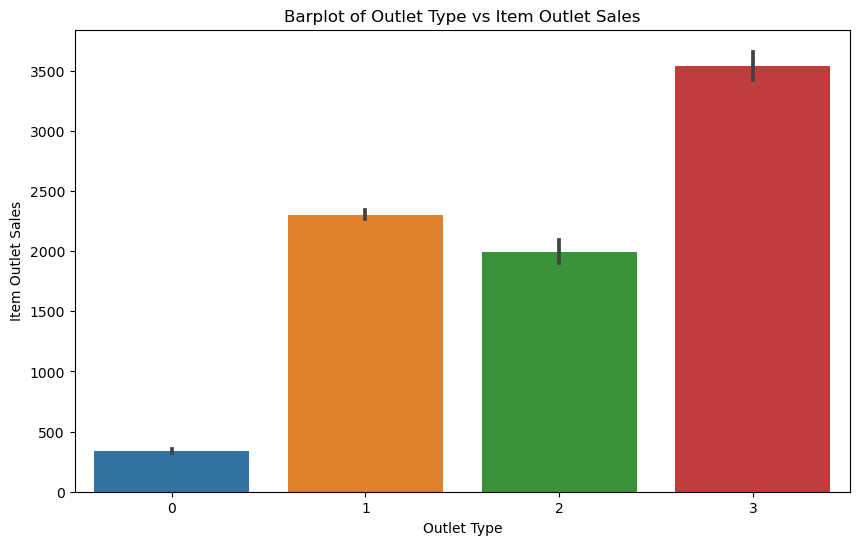

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Barplot of Outlet Type vs Item Outlet Sales')
plt.show()


In [56]:
import pandas as pd
from datetime import datetime

# Calculate Outlet Years
current_year = datetime.now().year
data['Outlet_Years'] = current_year - data['Outlet_Establishment_Year']

# Create New Item Identifier
data['New_Item_Identifier'] = data['Item_Identifier'].str[:2]

# Correct Item Fat Content
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})



In [57]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type_Code,Outlet_Years,New_Item_Identifier
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,1,24,FD
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,2,14,DR
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,1,24,FD
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,3,2,0,732.3800,0,25,FD
4,NCD19,8.93000,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,1,36,NC
5,FDP36,10.39500,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088,2,14,FD
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,1,343.5528,1,36,FD
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,3,4022.7636,3,38,FD
8,FDH17,16.20000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,3,1,1,1076.5986,1,21,FD
9,FDU28,19.20000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,3,1,1,4710.5350,1,16,FD


# Linear Regression

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



features = ["Outlet_Years", "Outlet_Type_Code", "Outlet_Type", "Outlet_Location_Type", "Outlet_Size"]

X_train, X_test, y_train, y_test = train_test_split(data[features], data["Item_Outlet_Sales"], test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


In [74]:
# Check the accuracy of the model on the training set
train_score = lr_model.score(X_train, y_train)
print("Training set score: {:.2f}".format(train_score))

# Check the accuracy of the model on the testing set
test_score = lr_model.score(X_test, y_test)
print("Testing set score: {:.2f}".format(test_score))


Training set score: 0.17
Testing set score: 0.19


In [86]:
from sklearn.linear_model import Ridge

# create a Ridge Regression object with alpha=0.05
ridge = Ridge(alpha=0.05)

# fit the model on training data
ridge.fit(X_train, y_train)

# calculate the accuracy scores
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

# print the scores
print("Training set score: {:.2f}".format(train_score))
print("Testing set score: {:.2f}".format(test_score))


Training set score: 0.24
Testing set score: 0.27


# XG BOOST

In [76]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert categorical features to one-hot encoding
categorical_columns = ['Outlet_Type_Code', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the XGBoost model and train it
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = xg_reg.predict(X_test)

# Calculate the root mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))


RMSE: 1565.102346


In [78]:
import xgboost as xgb

# Define the XGBoost model with regularization
model = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 100,
                          reg_alpha=0.01, 
                          reg_lambda=0.01)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate the root mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 1354.503831


In [79]:
from sklearn.linear_model import Lasso

# Create a Lasso model with alpha = 0.1
lasso_model = Lasso(alpha=0.1)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Evaluate the model on the training set
train_score = lasso_model.score(X_train, y_train)

# Evaluate the model on the testing set
test_score = lasso_model.score(X_test, y_test)

print(f"Training set score: {train_score:.2f}")
print(f"Testing set score: {test_score:.2f}")


Training set score: 0.24
Testing set score: 0.27


/Users/nihalshetty/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+06, tolerance: 1.822e+06
  model = cd_fast.enet_coordinate_descent(
